In [1]:
import pandas as pd

# Scarico il dataset.
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

In [3]:
# Imposto le opzioni di visualizzazione di pandas, separando le migliaia con la virgola e mostrando i numeri come interi.
pd.options.display.float_format = '{:,.0f}'.format

# Dimensioni del dataset
print("Dimensioni del dataset:", df.shape)

# Metadati
print(df.info())

Dimensioni del dataset: (409576, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409576 entries, 0 to 409575
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    409576 non-null  object 
 1   continent                                   389982 non-null  object 
 2   location                                    409576 non-null  object 
 3   date                                        409576 non-null  object 
 4   total_cases                                 370544 non-null  float64
 5   new_cases                                   398301 non-null  float64
 6   new_cases_smoothed                          397071 non-null  float64
 7   total_deaths                                347781 non-null  float64
 8   new_deaths                                  398701 non-null  float64
 9   new_deaths_smoothed              

In [5]:
# Seleziono l'ultimo record per ogni nazione.
latest_records = df.groupby('location').last().reset_index()

# Ottengo i casi totali per ogni nazione alla data più recente del Dataset.
latest_cases_per_country = latest_records[['location', 'continent', 'total_cases']]

# Raggruppo per continente e sommo i casi totali.
total_cases = latest_cases_per_country.groupby('continent')['total_cases'].sum()

# Rimuovo eventuali valori mancanti con dropna.
continent_cases = total_cases.dropna()

print(continent_cases)

continent
Africa           13,142,813
Asia            301,450,043
Europe          252,672,573
North America   124,572,913
Oceania          14,973,351
South America    68,831,052
Name: total_cases, dtype: float64


In [7]:
def compare_continents(df, continent1, continent2):

    # Seleziono l'ultimo record per ogni nazione.
    latest_records = df.sort_values('date').groupby('location').last().reset_index()

    # Ottengo i casi totali per ogni nazione alla data più recente del dataset.
    latest_cases_per_country = latest_records[['location', 'continent', 'total_cases']]

    # Seleziono i dati per i due continenti da confrontare.
    df_continent1 = latest_cases_per_country[latest_cases_per_country['continent'] == continent1]
    df_continent2 = latest_cases_per_country[latest_cases_per_country['continent'] == continent2]

    # Calcolo i descrittori statistici.
    max_cases_1 = df_continent1['total_cases'].max()
    max_cases_2 = df_continent2['total_cases'].max()

    mean_cases_1 = df_continent1['total_cases'].mean()
    mean_cases_2 = df_continent2['total_cases'].mean()

    tot_cases_1 = df_continent1['total_cases'].sum()
    tot_cases_2 = df_continent2['total_cases'].sum()

    # Calcolo la percentuale di casi globali (incluse locazioni senza continente).
    total_cases_world = df[df['location'] == 'World']['total_cases'].max()
    # Per trovare il valore dei casi totali nel mondo, ho fatto una ricerca della location = world.
    percentage_continent1 = (tot_cases_1 / total_cases_world) * 100
    percentage_continent2 = (tot_cases_2 / total_cases_world) * 100

    # Stampo i risultati.
    print(f"Confronto tra {continent1} e {continent2}:")
    print(f"Numero totali di casi nel mondo: {total_cases_world:,.0f}")
    # Ho calcolato anche il numero totale di casi nel mondo per verificare che i risultati siano coerenti e appropriati.
    print(f"Massimo casi in {continent1}: {max_cases_1:,.0f}")
    print(f"Massimo casi in {continent2}: {max_cases_2:,.0f}")
    print(f"Media casi in {continent1}: {mean_cases_1:,.0f}")
    print(f"Media casi in {continent2}: {mean_cases_2:,.0f}")
    print(f"Casi totali in {continent1}: {tot_cases_1:,.0f}")
    print(f"Casi totali in {continent2}: {tot_cases_2:,.0f}")
    print(f"Percentuale casi globali in {continent1}: {percentage_continent1:.2f}%")
    print(f"Percentuale casi globali in {continent2}: {percentage_continent2:.2f}%")
    # Ho aggiunto la formattazione :,.0f alla stampa dei risultati numerici per una migliore leggibilità, separando le migliaia con la virgola e mostrando i numeri come interi.
    # Nella % invece ho inserito la formattazione :.2f per vedere solamente gli ultimi due decimali per rendere la lettura più leggibile.

# Esempio di utilizzo con Europe e Asia.
compare_continents(df, 'Europe', 'Asia')

Confronto tra Europe e Asia:
Numero totali di casi nel mondo: 775,643,495
Massimo casi in Europe: 38,997,490
Massimo casi in Asia: 99,361,338
Media casi in Europe: 4,954,364
Media casi in Asia: 6,698,890
Casi totali in Europe: 252,672,573
Casi totali in Asia: 301,450,043
Percentuale casi globali in Europe: 32.58%
Percentuale casi globali in Asia: 38.86%


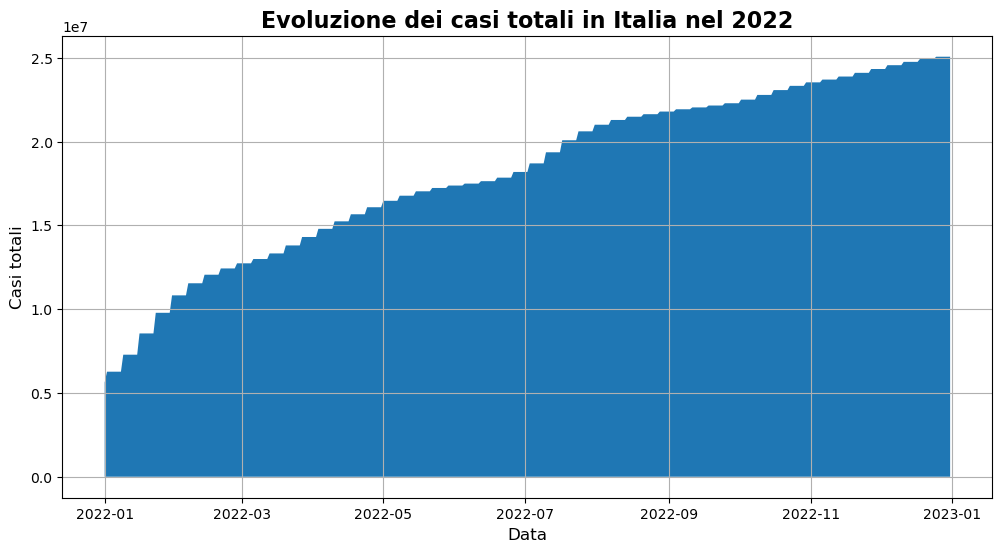

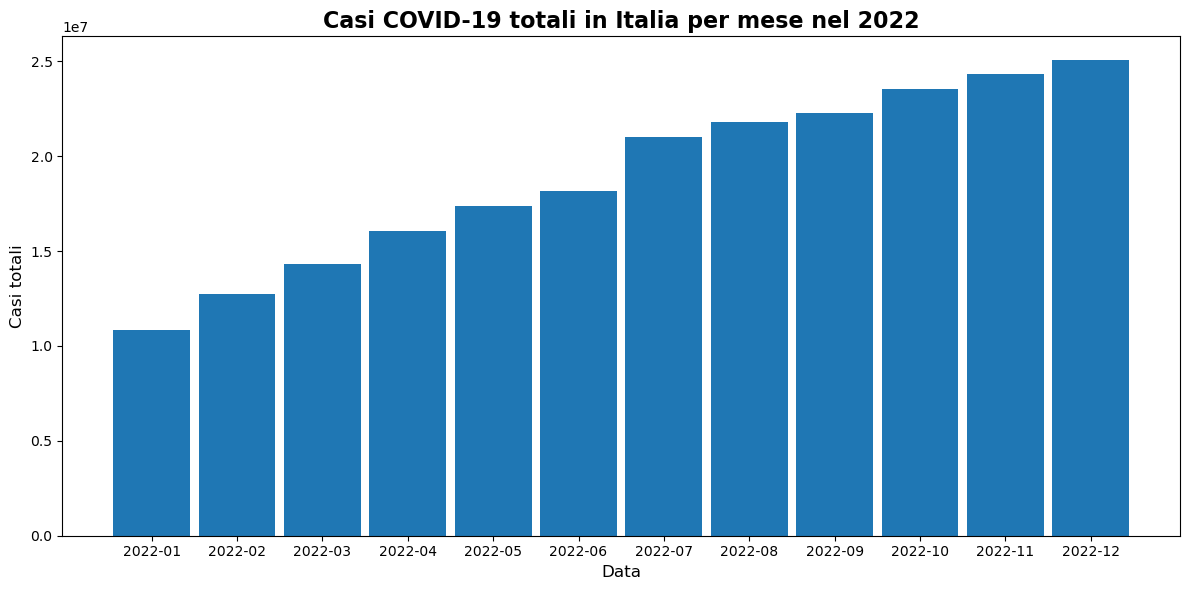

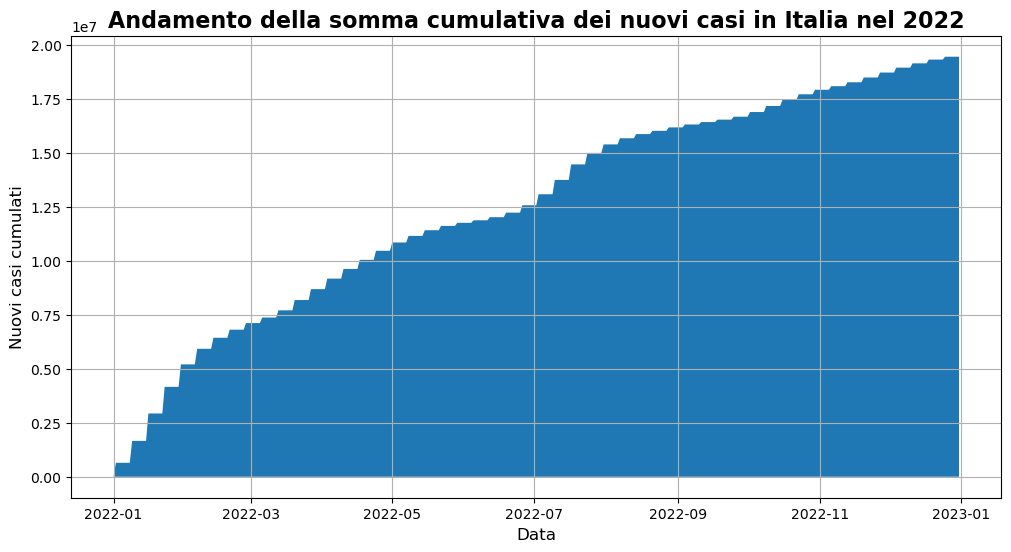

Commento:
Come si poteva immaginare, l'andamento della somma cumulativa dei nuovi casi è molto simile a quello dei casi totali.
Questo perché la somma cumulativa dei nuovi casi in un determinato giorno corrisponde al numero totale di casi fino a quel giorno.


In [9]:
import matplotlib.pyplot as plt

# Seleziona i dati per l'Italia nel 2022.
df_italy_2022 = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))].copy()
# Sto richiamando una vista del DataFrame originale e quindi modificarla potrebbe portare a comportamenti inaspettati e all'errore "SettingWithCopyWarning".
# Aggiungendo .copy() alla fine della selezione, mi assicuro di lavorare su una copia indipendente del DataFrame, evitando il "SettingWithCopyWarning" e altri possibili errori.
df_italy_2022['date'] = pd.to_datetime(df_italy_2022['date'])

# Grafico 1: Evoluzione dei casi totali.
plt.figure(figsize=(12, 6))

plt.fill_between(df_italy_2022['date'], df_italy_2022['total_cases'])
plt.xlabel('Data', fontsize=12)
plt.ylabel('Casi totali', fontsize=12)
plt.title('Evoluzione dei casi totali in Italia nel 2022', fontsize=16, fontweight='bold')

plt.grid(True)
plt.show()

# Grafico 2: Numero di nuovi casi giornalieri.
df_italy_2022['mese'] = df_italy_2022['date'].dt.strftime('%Y-%m')
df_casi_mensili = df_italy_2022.groupby('mese')['total_cases'].max()

plt.figure(figsize=(12, 6))
plt.bar(df_casi_mensili.index, df_casi_mensili.values, width=0.9)

plt.xlabel('Data', fontsize=12)
plt.ylabel('Casi totali', fontsize=12)
plt.title('Casi COVID-19 totali in Italia per mese nel 2022', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Grafico 3: Somma cumulativa dei nuovi casi.
df_italy_2022.loc[:, 'cumulative_new_cases'] = df_italy_2022['new_cases'].cumsum()
# Anche se non necessario, visto la copia indipendente creata per evitare errori, meglio utilizzare il .loc per chiarezza e coerenza del codice.
# Il .loc è buona regola utilizzarlo quando vado a modificare/aggiunta di nuove colonne come (cumulative_new_cases) e assegnando valori a quella determinata colonna.

plt.figure(figsize=(12, 6))
plt.fill_between(df_italy_2022['date'], df_italy_2022['cumulative_new_cases'])

plt.xlabel('Data', fontsize=12)
plt.ylabel('Nuovi casi cumulati', fontsize=12)
plt.title('Andamento della somma cumulativa dei nuovi casi in Italia nel 2022', fontsize=16, fontweight='bold')

plt.grid(True)
plt.show()

# Commento finale.
print("Commento:")
print("""Come si poteva immaginare, l'andamento della somma cumulativa dei nuovi casi è molto simile a quello dei casi totali.
Questo perché la somma cumulativa dei nuovi casi in un determinato giorno corrisponde al numero totale di casi fino a quel giorno.""")


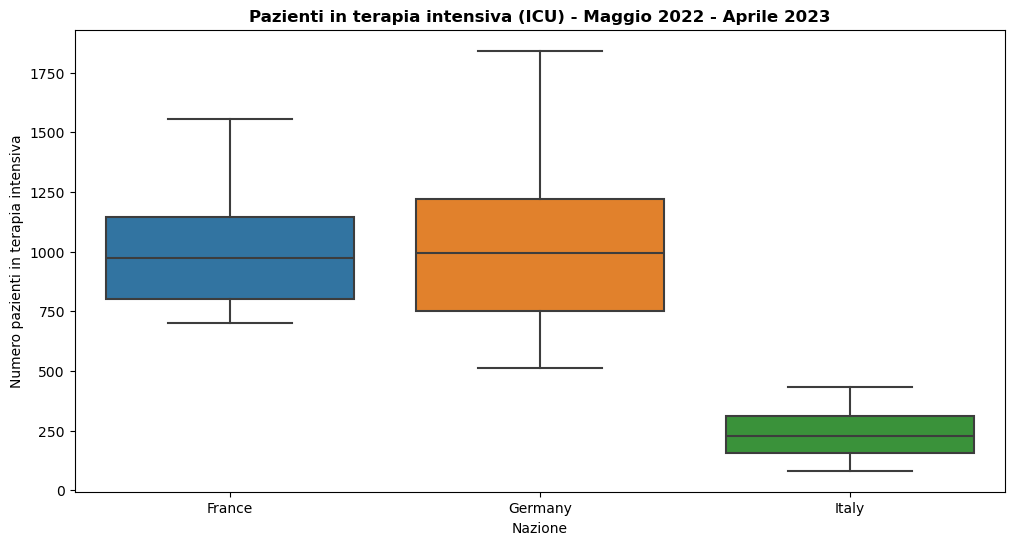

Commento:
Il boxplot mostra la distribuzione dei pazienti in terapia intensiva per COVID-19 in Italia, Germania e Francia nel periodo considerato.
Sarebbe opportuno verificare la completezza e la qualità dei dati, dato che il numero di posti letto in terapia intensiva e le politiche di ricovero variano da paese a paese.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleziono i dati per Italia, Germania e Francia da maggio 2022 ad aprile 2023.
countries = ['Italy', 'Germany', 'France']
start_date = '2022-05-01'
end_date = '2023-04-30'

df_filtered = df[df['location'].isin(countries) &
                 (df['date'] >= start_date) &
                 (df['date'] <= end_date)]

# Creo il boxplot.
plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='icu_patients', data=df_filtered)
plt.xlabel('Nazione')
plt.ylabel('Numero pazienti in terapia intensiva')
plt.title('Pazienti in terapia intensiva (ICU) - Maggio 2022 - Aprile 2023', fontweight='bold')
plt.show()

# Commento finale.
print("Commento:")
print("""Il boxplot mostra la distribuzione dei pazienti in terapia intensiva per COVID-19 in Italia, Germania e Francia nel periodo considerato.
Sarebbe opportuno verificare la completezza e la qualità dei dati, dato che il numero di posti letto in terapia intensiva e le politiche di ricovero variano da paese a paese.""")

In [13]:
# Seleziono dati per Italia, Germania, Francia e Spagna nel 2023.
countries = ['Italy', 'Germany', 'France', 'Spain']
df_2023 = df[(df['location'].isin(countries)) & (df['date'].str.startswith('2023'))]

# Sommo i pazienti ospedalizzati per ogni nazione.
hospitalized_patients = df_2023.groupby('location')['hosp_patients'].sum()

print("Somma dei pazienti ospedalizzati nel 2023:")
print(hospitalized_patients)

# Commento finale
print("Commento:")
print("""La Germania ha un risultato pari a 0 per il numero di pazienti ospedalizzati, il che è sospetto e potrebbe indicare una mancanza di aggiornamento dei dati per questo paese.
Sconsiglio di procedere con una sostituzione dei valori mancanti, in quanto ciò potrebbe manipolare i dati in modo non appropriato.
Si consiglia di cercare altre fonti ufficiali per ottenere dati aggiornati sulla Germania o di escludere questo paese dall'analisi.""")

Somma dei pazienti ospedalizzati nel 2023:
location
France    1,382,574
Germany           0
Italy     1,175,272
Spain       354,602
Name: hosp_patients, dtype: float64
Commento:
La Germania ha un risultato pari a 0 per il numero di pazienti ospedalizzati, il che è sospetto e potrebbe indicare una mancanza di aggiornamento dei dati per questo paese.
Sconsiglio di procedere con una sostituzione dei valori mancanti, in quanto ciò potrebbe manipolare i dati in modo non appropriato.
Si consiglia di cercare altre fonti ufficiali per ottenere dati aggiornati sulla Germania o di escludere questo paese dall'analisi.
